In [1]:
%pylab inline

import cv2
from IPython.display import YouTubeVideo

Populating the interactive namespace from numpy and matplotlib


We're trying to make this!

In [2]:
YouTubeVideo('https://www.youtube.com/watch?v=U1KiC0AXhHg')

Except we'll use this image instead

In [3]:
raw = cv2.imread('images/hannibal.png')
raw = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)

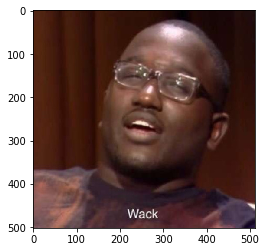

In [4]:
plt.imshow(raw)